<a href="https://colab.research.google.com/github/MiguelAngel-ht/Quantum-Computing/blob/main/Quantum_Teleportation_(with_products).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Teleportation**

Teleportation is the transmission of quantum information using a classical channel and entanglement. 

Cause this transmission is with a classical channel, the information can´t be faster than light speed.


In [1]:
import numpy as np

**Problem 4.** In quantum teleportation we start with the following state in the Hilbert space $\mathbb{C}^8$

$A_0 = |Ψ \rangle$

$B_0 = |0 \rangle$

$C_0 = |0 \rangle$

$E_0 = |Ψ \rangle ⊗ |0 \rangle ⊗ |0 \rangle $

In [2]:
theta = 2.1
phi = np.pi
A0 = np.array([[np.cos(theta)],[np.sin(theta)*np.exp(1j*phi)]])
B0 = np.array([[1],[0]]) 
C0 = np.array([[1],[0]])

In [3]:
# Initial State

E0 = np.kron(np.kron(A0,B0),C0)
np.round(E0, 3)

array([[-0.505+0.j],
       [-0.   +0.j],
       [-0.   +0.j],
       [-0.   +0.j],
       [-0.863+0.j],
       [-0.   +0.j],
       [-0.   +0.j],
       [-0.   +0.j]])

The quantum circuit for teleportation is given by
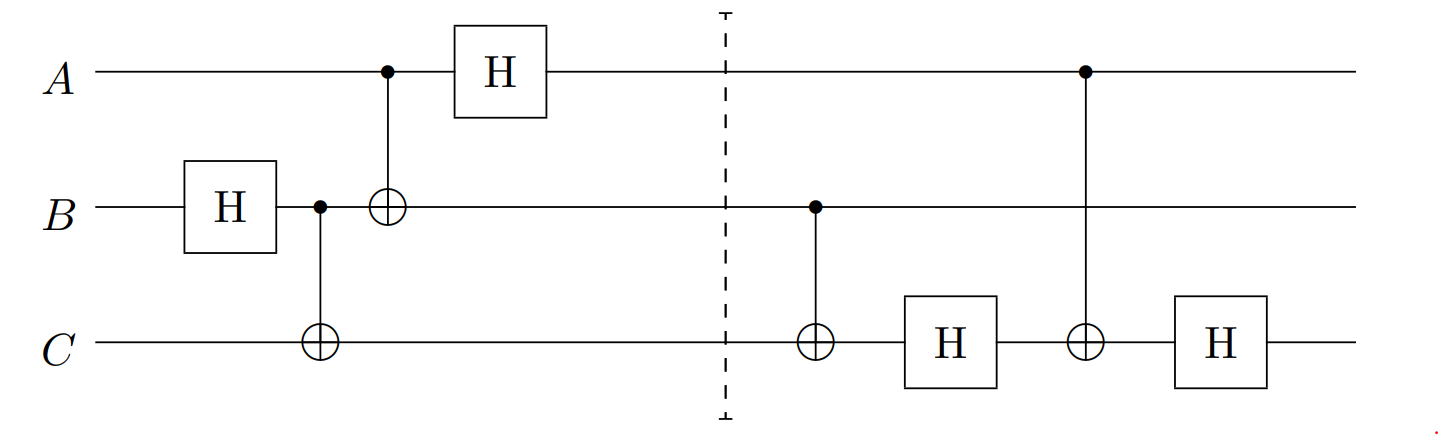

In [4]:
# Common Gates

I2 = np.array([[1,0],[0,1]])
ox = np.array([[0,1],[1,0]])
oy = np.array([[0,-1j],[1j,0]])
oz = np.array([[1,0],[0,-1]])

In [5]:
# HADAMMAR, XOR AND NOT GATES

U_H = (1/np.sqrt(2)) * np.array([[1,1],[1,-1]]) 
U_XOR = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U_NOT = ox

Let be

$U_1 = I_2 \otimes U_H ⊗ I_2$

$U_2 = I_2 \otimes U_{XOR}$

$U_3 = U_{XOR} ⊗ I_2$

$U_4 = U_H ⊗ I_2 ⊗ I_2$

$U_5 = I_2 ⊗ U_{XOR}$

$U_6 = I_2 \otimes I_2  ⊗ U_H$

$U_7 = I_4 ⊕ U_{NOT} ⊕ U_{NOT}$

$U_6 = I_2 \otimes I_2  ⊗ U_H$


**i)** Find $U_8 U_7 U_6 U_5 U_4 U_3 U_2 U_1|ψ00⟩$.

In [6]:
# FUNCTION OF DIRECT SUM

def direct_sum(rep1,rep2):
  n1 = len(rep1)
  n2 = len(rep2)
  cv = np.zeros((n1,n2))          # A⊕B = ( A  0 )
  ch = np.zeros((n2,n1))          #        ( 0  B )
 
  aux1 = np.concatenate([rep1,cv],1)  # --> ( A  0 ) 
  aux2 = np.concatenate([ch,rep2],1)  # --> ( 0  B )
  res = np.concatenate([aux1,aux2])   # --> A⊕B

  return res

In [7]:
# OPERATIONS

U_1 = np.kron(np.kron(I2,U_H),I2)
U_2 = np.kron(I2,U_XOR)
U_3 = np.kron(U_XOR,I2)
U_4 = np.kron(np.kron(U_H,I2),I2)
U_5 = U_2
I4 = np.kron(I2,I2)
U_6 = np.kron(I4,U_H)
U_7 = direct_sum(I4,direct_sum(U_NOT,U_NOT))
U_8 = U_6

In [9]:
# FINAL CALCULATION

U = U_8 @ U_7 @ U_6 @ U_5 @ U_4 @ U_3 @ U_2 @ U_1 @ E0 
np.round(U, 3)

array([[-0.252-0.j],
       [-0.432+0.j],
       [-0.252-0.j],
       [-0.432+0.j],
       [-0.252+0.j],
       [-0.432+0.j],
       [-0.252+0.j],
       [-0.432+0.j]])

## **Referenc of Problem**


**[1] Steeb, W., & Hardy, Y. (2018, 13 febrero). Problems And Solutions In Quantum Computing And Quantum Information (4Th Edition) (4th Edition). WSPC. pag 313.*